### Load data

In [14]:
# load
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
finaldf = pd.read_csv('csv2_final_loan_XGBoost_IncomeLoanLimits_2007_2017_noCountyStateCodes-SUBMIT')
finaldf

,year,loan_type,loan_purpose,loan_amount_000s,action_taken,state,state_code,county_code,applicant_income_000s,denial_reason_1,income_range,loan_amount_range,denial_rate_%
0,2007,2,1,105.0,3,NC,37.0,159.0,34.0,1.0,(30-40],(100-200],11.772744
1,2007,2,1,148.0,2,NC,37.0,193.0,60.0,NaN,(50-60],(100-200],9.280838
2,2007,2,1,151.0,1,TN,47.0,157.0,53.0,NaN,(50-60],(100-200],9.280838
3,2007,2,1,103.0,6,SD,46.0,65.0,23.0,NaN,(20-30],(100-200],18.801683
4,2007,2,1,30.0,2,NC,37.0,165.0,19.0,NaN,(10-20],(0-100],25.923851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051385,2017,2,1,42.0,3,IL,17.0,39.0,47.0,3.0,(40-50],(0-100],13.377404
9051386,2017,2,1,172.0,2,CT,9.0,9.0,70.0,NaN,(60-70],(100-200],8.655376
9051387,2017,2,1,76.0,1,LA,22.0,17.0,19.0,NaN,(10-20],(0-100],25.923851
9051388,2017,2,1,99.0,1,LA,22.0,17.0,28.0,NaN,(20-30],(0-100],15.802986


In [15]:
# check which columns have NaN values
nan_columns = finaldf.columns[finaldf.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['denial_reason_1']


In [16]:
# change NaN to None in denial_reason_1 column
finaldf['denial_reason_1'] = finaldf['denial_reason_1'].fillna("None")

In [17]:
# Ensure no columns have NaN values
nan_columns = finaldf.columns[finaldf.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)
finaldf

Columns with NaN values: []


,year,loan_type,loan_purpose,loan_amount_000s,action_taken,state,state_code,county_code,applicant_income_000s,denial_reason_1,income_range,loan_amount_range,denial_rate_%
0,2007,2,1,105.0,3,NC,37.0,159.0,34.0,1.0,(30-40],(100-200],11.772744
1,2007,2,1,148.0,2,NC,37.0,193.0,60.0,None,(50-60],(100-200],9.280838
2,2007,2,1,151.0,1,TN,47.0,157.0,53.0,None,(50-60],(100-200],9.280838
3,2007,2,1,103.0,6,SD,46.0,65.0,23.0,None,(20-30],(100-200],18.801683
4,2007,2,1,30.0,2,NC,37.0,165.0,19.0,None,(10-20],(0-100],25.923851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051385,2017,2,1,42.0,3,IL,17.0,39.0,47.0,3.0,(40-50],(0-100],13.377404
9051386,2017,2,1,172.0,2,CT,9.0,9.0,70.0,None,(60-70],(100-200],8.655376
9051387,2017,2,1,76.0,1,LA,22.0,17.0,19.0,None,(10-20],(0-100],25.923851
9051388,2017,2,1,99.0,1,LA,22.0,17.0,28.0,None,(20-30],(0-100],15.802986


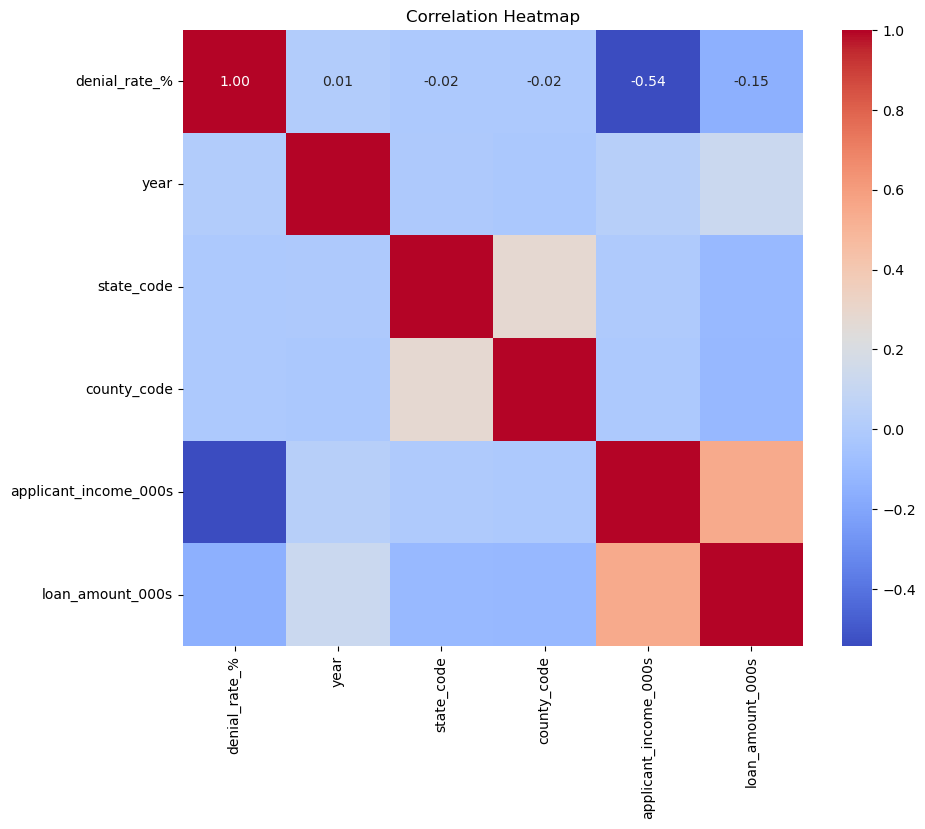

In [18]:
columns_to_use = ['denial_rate_%', 'year', 'state_code', 'county_code', 'applicant_income_000s', 'loan_amount_000s']
correlation_matrix = finaldf[columns_to_use].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Take log of denial rates

In [19]:
# original = finaldf.copy()

In [27]:
finaldf = original.copy()

In [28]:
finaldf['denial_rate_%'].skew()

5.545237594433302

In [29]:
import numpy as np
finaldf['denial_rate_%'] = np.log(finaldf['denial_rate_%'])

In [30]:
finaldf['denial_rate_%'].skew()

1.95637573561707

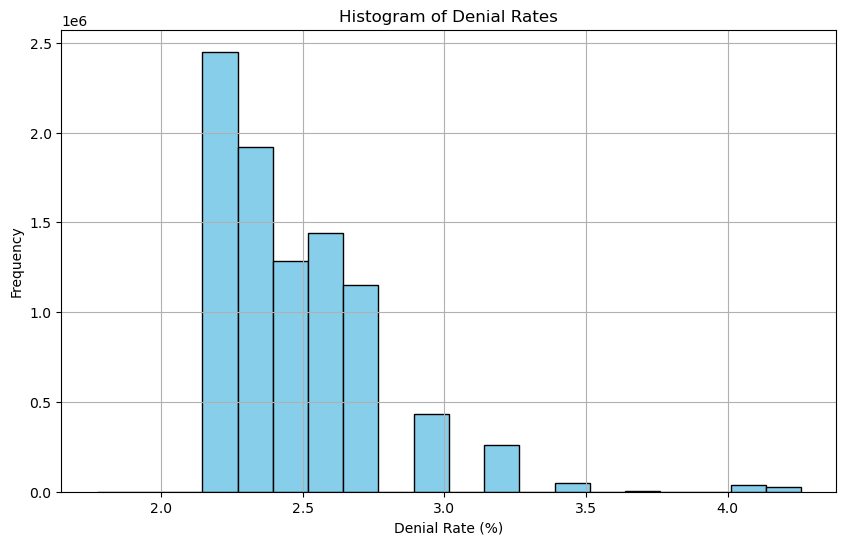

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting histogram to see distribution of denial rates 
plt.figure(figsize=(10, 6))
plt.hist(finaldf['denial_rate_%'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Denial Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Denial Rates')
plt.grid(True)
plt.show()

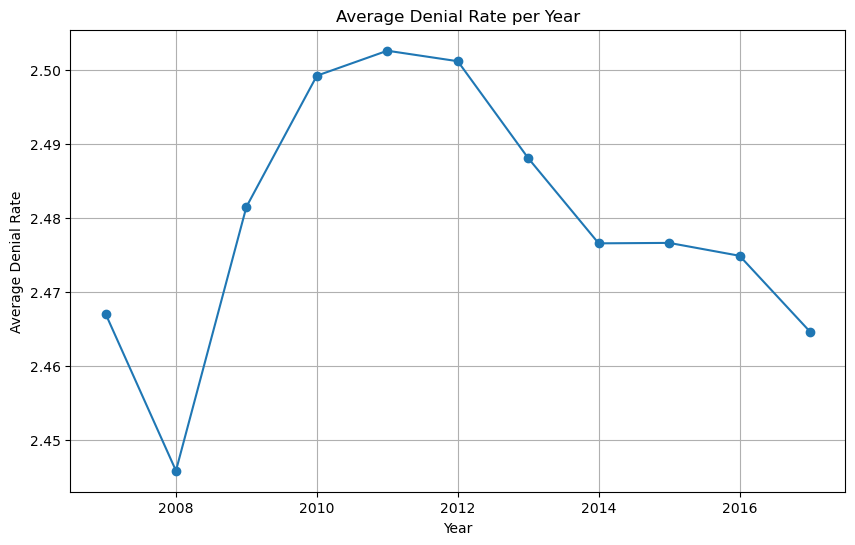

In [32]:
# Mean denial rate over time scatterplot
denial_rate_by_year = finaldf.groupby('year')['denial_rate_%'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(denial_rate_by_year.index, denial_rate_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Denial Rate')
plt.title('Average Denial Rate per Year')
plt.grid(True)
plt.show()

## Feature matrix and target vector

In [33]:
df = finaldf.loc[:, ['denial_rate_%', 'year', 'applicant_income_000s', 'loan_amount_000s']]
# sort df by year
df = df.sort_values(by='year')
df.reset_index(drop=True, inplace=True)
df

,denial_rate_%,year,applicant_income_000s,loan_amount_000s
0,2.227952,2007,52.0,178.0
1,2.760199,2007,22.0,70.0
2,2.760199,2007,22.0,62.0
3,2.227952,2007,55.0,165.0
4,2.465787,2007,37.0,130.0
...,...,...,...,...
9051385,2.593567,2017,42.0,96.0
9051386,2.227952,2017,53.0,158.0
9051387,2.227952,2017,55.0,102.0
9051388,2.614457,2017,64.0,333.0


In [34]:
# feature matrix dataframe
X = df.iloc[:, 1:]
print("--- FEATURE MATRIX --- ")
print(X, "\n")

# target dataframe
y = df.iloc[:, 0]
print("--- DENIAL RATE COLUMN (TARGET) --- ")
print(y)

--- FEATURE MATRIX --- 
         year  applicant_income_000s  loan_amount_000s
0        2007                   52.0             178.0
1        2007                   22.0              70.0
2        2007                   22.0              62.0
3        2007                   55.0             165.0
4        2007                   37.0             130.0
...       ...                    ...               ...
9051385  2017                   42.0              96.0
9051386  2017                   53.0             158.0
9051387  2017                   55.0             102.0
9051388  2017                   64.0             333.0
9051389  2017                   59.0             285.0

[9051390 rows x 3 columns] 

--- DENIAL RATE COLUMN (TARGET) --- 
0          2.227952
1          2.760199
2          2.760199
3          2.227952
4          2.465787
             ...   
9051385    2.593567
9051386    2.227952
9051387    2.227952
9051388    2.614457
9051389    2.383477
Name: denial_rate_%, Length: 

# Training and Evaluation: XGBoost regression

### Baseline models

In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Calculate the mean of the target variable (housing prices)
baseline_prediction = np.mean(y)

# Create an array of baseline predictions with the same length as the true target values
baseline_predictions = np.full_like(y, baseline_prediction)

# Calculate metrics using the baseline predictions
baseline_mse = mean_squared_error(y, baseline_predictions)
baseline_absError = mean_absolute_error(y, baseline_predictions)
baseline_rsquared = r2_score(y, baseline_predictions)

print("Baseline Mean Squared Error (MSE):", baseline_mse)
print("Baseline R-Squared Error (r2_score):", baseline_rsquared)
print("Baseline Root Mean Squared Error (RMSE):", np.sqrt(baseline_mse))
print("Baseline Mean Absolute Error (MAE):", baseline_absError)

Baseline Mean Squared Error (MSE): 0.08888353742631684
Baseline R-Squared Error (r2_score): 0.0
Baseline Root Mean Squared Error (RMSE): 0.29813342218932254
Baseline Mean Absolute Error (MAE): 0.222299327684476


In [36]:
def baseline(y):
    # Calculate the mean of the target variable (housing prices)
    baseline_prediction = np.mean(y)
    
    # Create an array of baseline predictions with the same length as the true target values
    baseline_predictions = np.full_like(y, baseline_prediction)
    
    # Calculate metrics using the baseline predictions
    baseline_mse = mean_squared_error(y, baseline_predictions)
    baseline_absError = mean_absolute_error(y, baseline_predictions)
    baseline_rsquared = r2_score(y, baseline_predictions)
    
    print("Baseline MSE:", baseline_mse)
    print("Baseline R2:", baseline_rsquared)
    return(baseline_mse, baseline_rsquared)

### Graphs Functions

In [37]:
import matplotlib.pyplot as plt

# Function to plot predicted vs. true values
def plot_predicted_vs_true(y_true, y_pred):
    plt.figure(figsize=(8, 6))

    # set limits of x to match predictions range and y axis to match true values range
    plt.xlim(y_pred.min(), y_pred.max())
    plt.ylim(y_true.min(), y_true.max())
    
    # Plot true values in blue
    plt.scatter(y_true, y_true, color='black', label='True Values')
    
    # Plot predicted values in green
    plt.scatter(y_pred, y_true, color='blue', label='Predicted Values')
    
    # Plot a diagonal line representing perfect predictions
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Perfect Predictions')
    
    plt.xlabel('Predicted')
    plt.ylabel('True Values')
    plt.title('Predicted vs. True Values')
    plt.axis('equal')
    plt.legend()
    plt.grid(True)
    plt.show()

In [38]:
def plot_residuals_hist(true, y_pred):
    residuals = true - y_pred

    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=20, edgecolor = "white")
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.show()

In [39]:
def plot_residuals(true, y_pred):
    residuals = true - y_pred

    # Plot residuals against predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.grid(True)
    plt.show()

## Train and evaluate

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

# Define metrics to be used for evaluation.
metrics = [mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score]

In [41]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator
from typing import List, Dict, Union, Callable
from typing import Any

# Will train model on years before test_years, and evaluate predictions within test_years.
def train_test_model (
        test_years, 
        model: Any,
        X: np.ndarray,
        y: np.ndarray,
        metrics: Union[List[Callable], Callable] = mean_squared_error,
    ):
    """
    Perform rolling cross-validation on time-series data.

    Parameters:
    - model: The machine learning model to use (should have fit and predict methods)
    - X: The feature matrix
    - y: The target vector
    - metrics: A metric or list of metrics to calculate

    """

    
    # If only a single metric is provided, put it in a list (otherwise, metrics is a Callable function, not a list -- causes issues)
    if callable(metrics):
        metrics = [metrics]

    # Initialize dictionary to hold metric results -- key is metric name and value an empty list.
    metric_results = {metric.__name__: [] for metric in metrics}

    # Train model on years before first test year
    train_index = df[df['year'] < test_years[0]].index
    X_train, y_train = X[train_index], y[train_index]
    model.fit(X_train, y_train)
    
    true_values = np.empty(0)
    predicted_values = np.empty(0)
    baseline_mse = []
    baseline_r2 = []
    
    # Make predictions for future test years
    for test_year in test_years:
        test_index = df[df['year'] == test_year].index
        
        # Create train/test splits -- using array indexing to obtain rows in np.array X and y.
        X_test, y_test = X[test_index], y[test_index]

        # Make predictions on features of test subset.
        # verified - predict():  If the model is trained with early stopping, then best_iteration is used automatically.
        y_pred = model.predict(X_test)
        
        # Calculate and store metric(s) -- compare predictions with true output for housing price
        for metric in metrics:
            metric_value = metric(y_test, y_pred)
            metric_results[metric.__name__].append(metric_value)

        # save predictions and true values
        true_values = np.concatenate((true_values, y_test))
        predicted_values = np.concatenate((predicted_values, y_pred))

        # print year
        print(f"\n --- Year = {test_year} --- ")
        # print MSE of predictions and true values of current year    
        MSE = metric_results["mean_squared_error"][-1]
        print(f"MSE: {MSE}")

        # print r-squared of predictions of current year
        r_squared = metric_results["r2_score"][-1]
        print(f"r2 score: {r_squared}")

        b_mse, b_r2 = baseline(y_test)
        baseline_mse.append(b_mse)
        baseline_r2.append(b_r2)


    # Make plots to visualize performance
    plot_predicted_vs_true(true_values, predicted_values)
    plot_residuals_hist(true_values, predicted_values)
    plot_residuals(true_values, predicted_values)

    print("--- Metric Results Across Folds: ----")
    print(metric_results)

    print(f"True values: {y_test}")
    print(f"Predictions: {y_pred}")

    # print mean MSE score of folds from cross validation
    avg_MSE_score = np.mean(metric_results['mean_squared_error'])
    print(f"Average MSE score: {avg_MSE_score}")

    # print mean r-squared score of folds from cross validation
    avg_rsquared_score = np.mean(metric_results['r2_score'])
    print(f"Average r2 score: {avg_rsquared_score}")

    # print average baseline scores
    baseline_mse = np.array(baseline_mse)
    baseline_r2 = np.array(baseline_r2)
    
    avg_baseline_mse = np.mean(baseline_mse)
    print(f"Average baseline MSE: {avg_baseline_mse}")

    avg_baseline_r2 = np.mean(baseline_r2)
    print(f"Average baseline r2: {avg_baseline_r2}")
    
    return (true_values, predicted_values)

### Test on 2015


 --- Year = 2015 --- 
MSE: 0.049038598063627384
r2 score: 0.4582821121997448
Baseline MSE: 0.09052423626392993
Baseline R2: 0.0


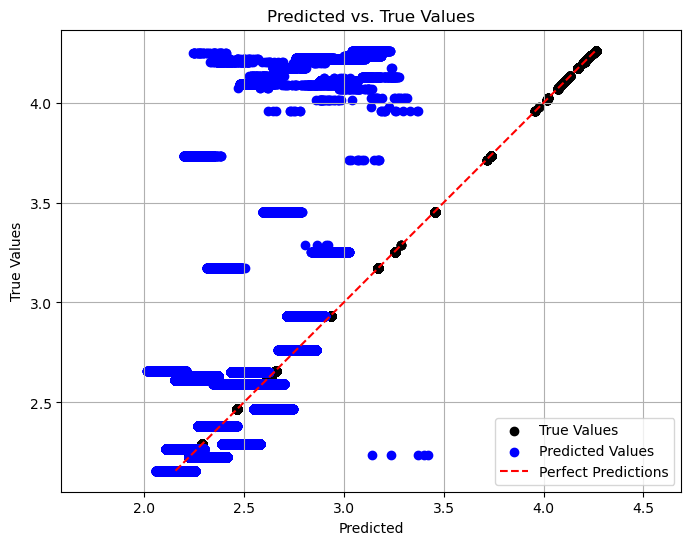

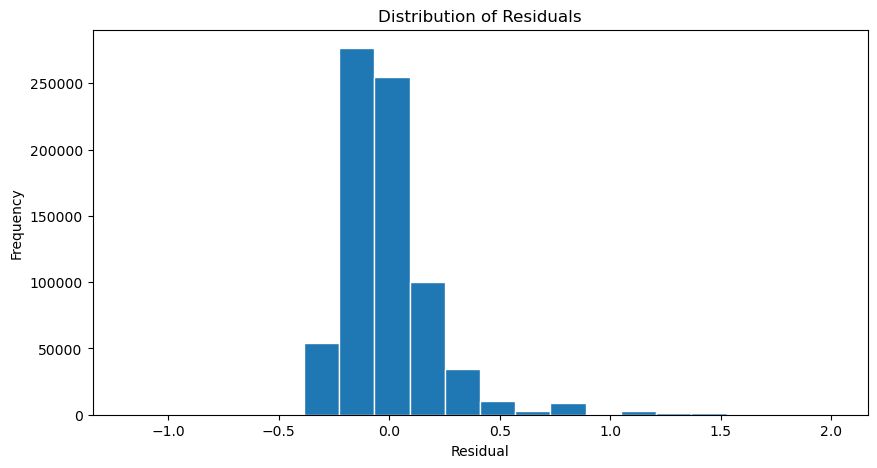

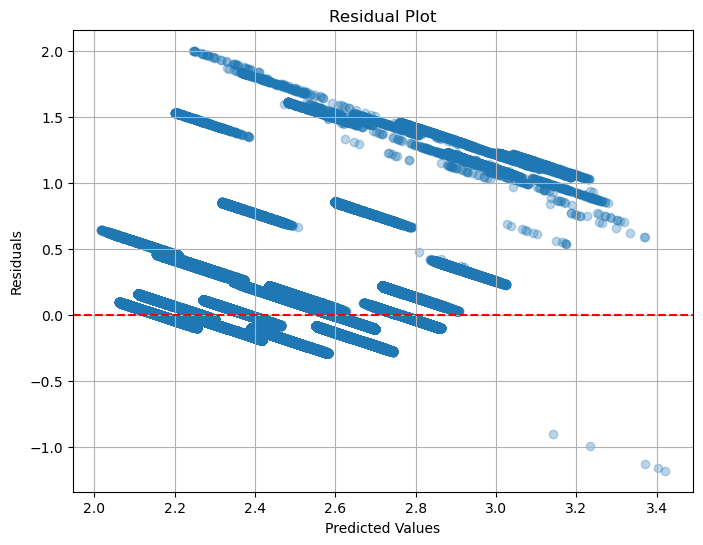

--- Metric Results Across Folds: ----
{'mean_squared_error': [0.049038598063627384], 'root_mean_squared_error': [0.22144660318827963], 'mean_absolute_error': [0.15037616516741625], 'r2_score': [0.4582821121997448]}
True values: [2.29070772 2.46578707 2.22795189 ... 2.15818065 2.29070772 2.59275966]
Predictions: [2.52230964 2.64032549 2.35395061 ... 2.24837135 2.41007029 2.69137841]
Average MSE score: 0.049038598063627384
Average r2 score: 0.4582821121997448
Average baseline MSE: 0.09052423626392993
Average baseline r2: 0.0


In [42]:
test_years = [2015]
true_values, predicted_values = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)

### Test on 2016


 --- Year = 2016 --- 
MSE: 0.05214164125657155
r2 score: 0.43662564067804155
Baseline MSE: 0.09255238615993443
Baseline R2: 0.0


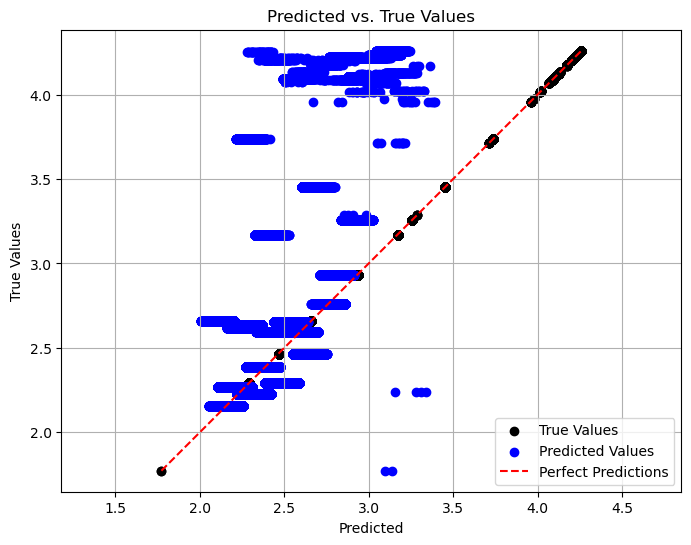

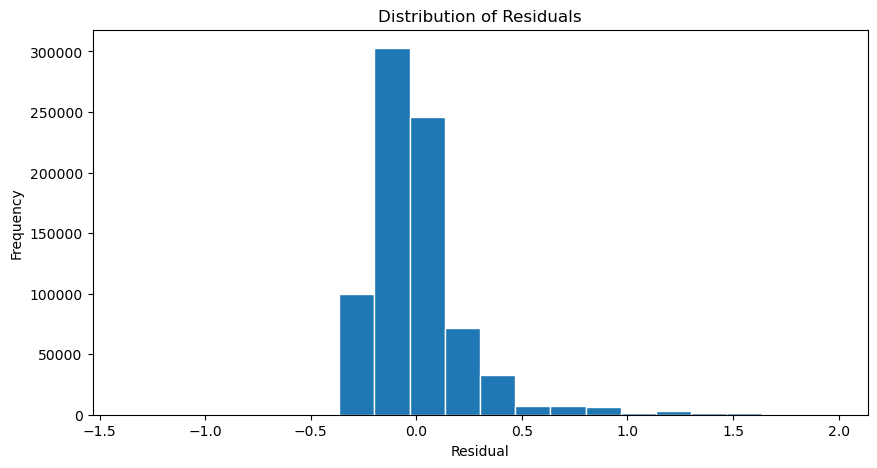

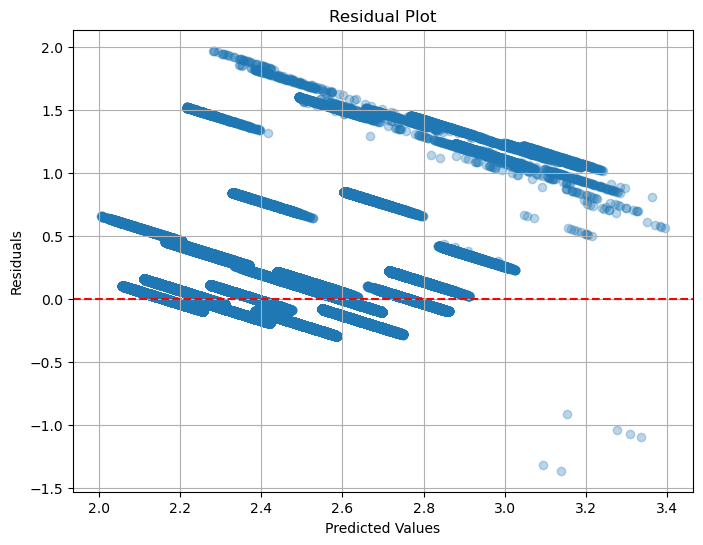

--- Metric Results Across Folds: ----
{'mean_squared_error': [0.05214164125657155], 'root_mean_squared_error': [0.22834544281980218], 'mean_absolute_error': [0.1534574787774042], 'r2_score': [0.43662564067804155]}
True values: [2.29070772 2.46578707 2.29070772 ... 2.46578707 2.29070772 2.59275966]
Predictions: [2.49985166 2.67274466 2.5236954  ... 2.67646781 2.53331459 2.55653568]
Average MSE score: 0.05214164125657155
Average r2 score: 0.43662564067804155
Average baseline MSE: 0.09255238615993443
Average baseline r2: 0.0


In [43]:
test_years = [2016]
true_values, predicted_values = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)

### Test on 2017


 --- Year = 2017 --- 
MSE: 0.051827064038488656
r2 score: 0.4320040579247001
Baseline MSE: 0.09124548293272468
Baseline R2: 0.0


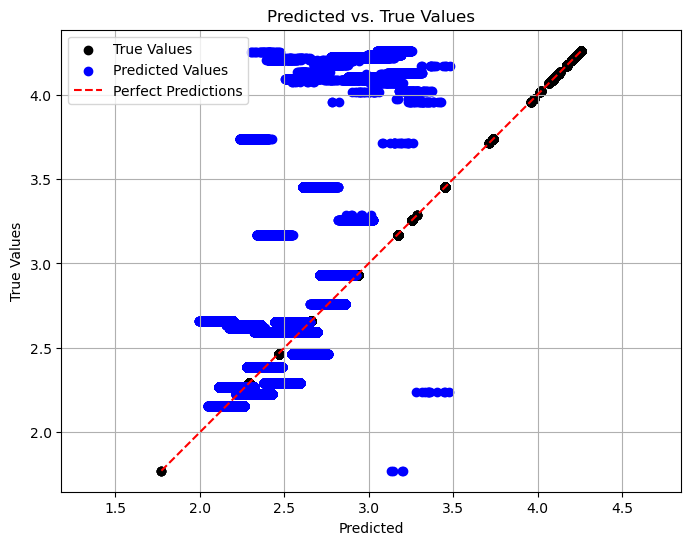

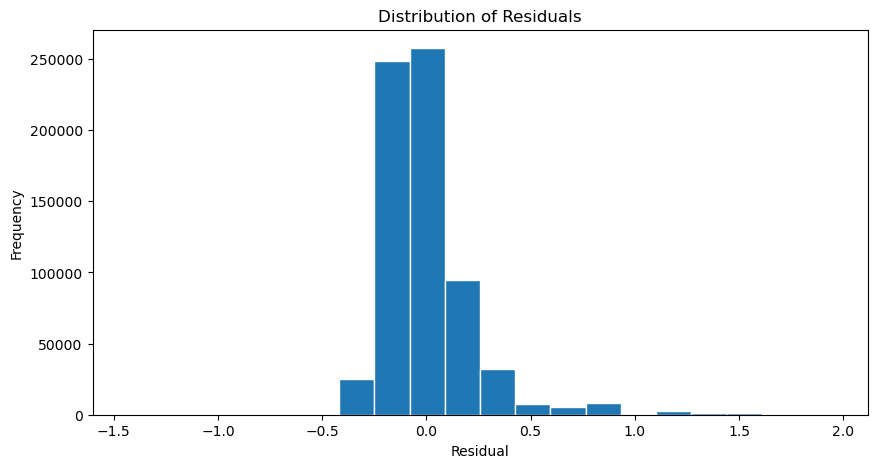

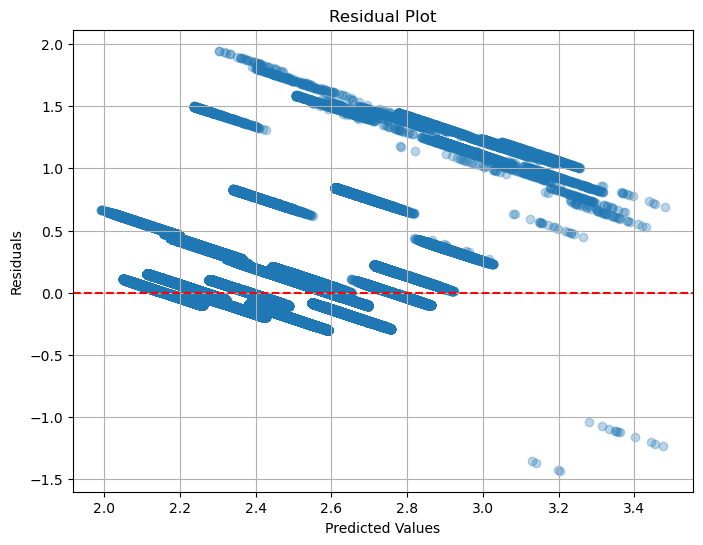

--- Metric Results Across Folds: ----
{'mean_squared_error': [0.051827064038488656], 'root_mean_squared_error': [0.22765558204992176], 'mean_absolute_error': [0.1524344070406574], 'r2_score': [0.4320040579247001]}
True values: [2.15818065 2.22795189 2.29070772 ... 2.22795189 2.61445676 2.38347679]
Predictions: [2.2484229  2.26695022 2.40162797 ... 2.2994889  2.29364598 2.34675233]
Average MSE score: 0.051827064038488656
Average r2 score: 0.4320040579247001
Average baseline MSE: 0.09124548293272468
Average baseline r2: 0.0


In [44]:
test_years = [2017]
true_values, predicted_values = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)

### Test on 2015-2017


 --- Year = 2015 --- 
MSE: 0.049038598063627384
r2 score: 0.4582821121997448
Baseline MSE: 0.09052423626392993
Baseline R2: 0.0

 --- Year = 2016 --- 
MSE: 0.05249819915053568
r2 score: 0.43277314255500043
Baseline MSE: 0.09255238615993443
Baseline R2: 0.0

 --- Year = 2017 --- 
MSE: 0.05268596960748541
r2 score: 0.4225909281851158
Baseline MSE: 0.09124548293272468
Baseline R2: 0.0


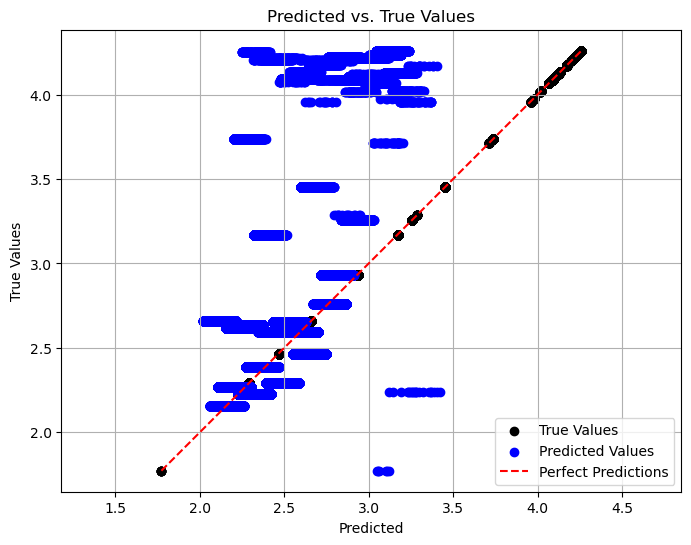

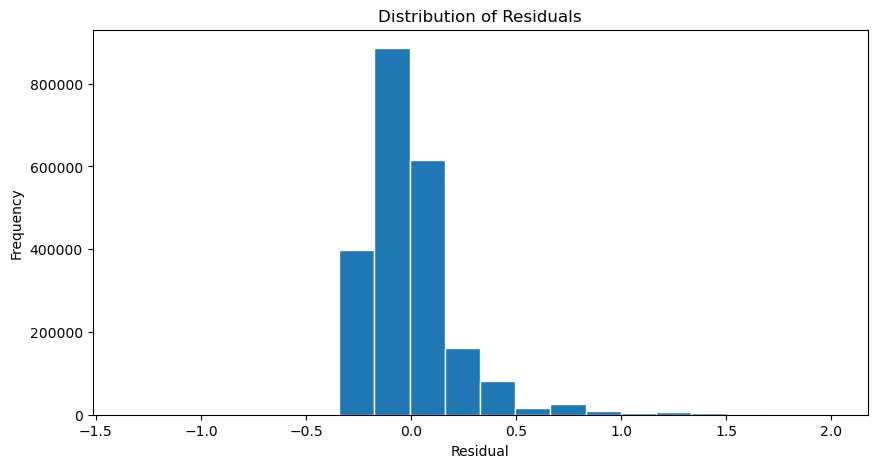

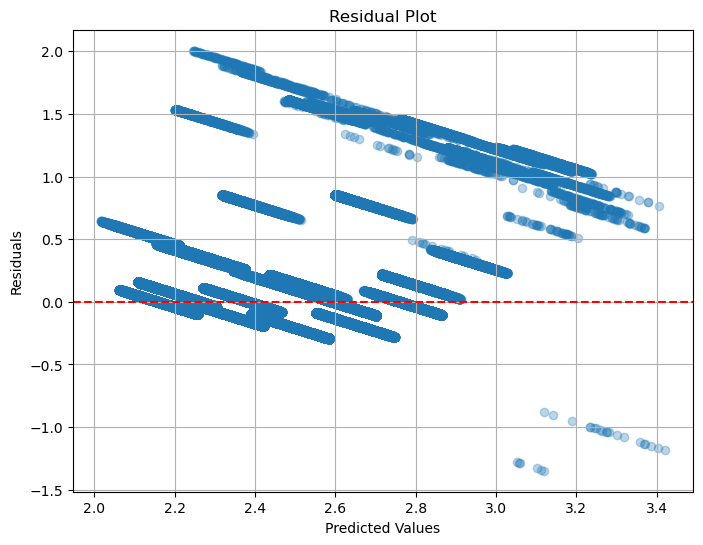

--- Metric Results Across Folds: ----
{'mean_squared_error': [0.049038598063627384, 0.05249819915053568, 0.05268596960748541], 'root_mean_squared_error': [0.22144660318827963, 0.22912485493838436, 0.22953424495592245], 'mean_absolute_error': [0.15037616516741625, 0.1542764953225224, 0.15400208114555375], 'r2_score': [0.4582821121997448, 0.43277314255500043, 0.4225909281851158]}
True values: [2.15818065 2.22795189 2.29070772 ... 2.22795189 2.61445676 2.38347679]
Predictions: [2.24916367 2.27902832 2.40717769 ... 2.31123369 2.27063871 2.33019417]
Average MSE score: 0.051407588940549497
Average r2 score: 0.43788206097995364
Average baseline MSE: 0.09144070178552967
Average baseline r2: 0.0


In [45]:
test_years = [2015, 2016, 2017]
true_values, predicted_values = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)